In [1]:
import torch
import torch.nn as nn
import torchvision
from torchsummary import summary

import os
import json
import h5py
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

from datasets import CaptionDataset
from models import Encoder, Attention, DecoderWithAttention
from caption import caption_image_beam_search, visualize_att, _read_image, caps_to_string

%load_ext autoreload
%autoreload 2

In this file we're going to use a pretrained model to generate caption for an image. Before analysing the code we'd prefer to see the final result.

# 01 Loading an image

Let's have a loook at an image.

In [3]:
DATA_DIR = '/Users/ilyarudyak/Library/Mobile Documents/com~apple~CloudDocs/datasets/coco/'
image_path = os.path.join(DATA_DIR, 'boat.jpg')

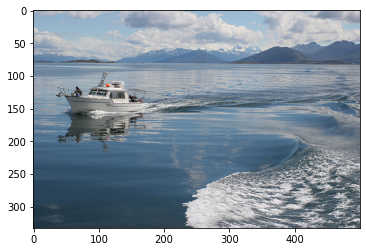

In [4]:
plt.imshow(Image.open(image_path));

# 02 Loading a pre-trained model

There's a link in the tutorial to the pre-trained model and vocabulary file for COCO dataset (see [here](https://drive.google.com/drive/folders/189VY65I_n4RTpQnmLGj7IzVnOF6dmePC)). We are going to use them here.

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

checkpoint_file = os.path.join(DATA_DIR, 'BEST_checkpoint_coco.pth.tar')
checkpoint = torch.load(checkpoint_file, map_location=str(device))

decoder, encoder = checkpoint['decoder'], checkpoint['encoder']
decoder.eval();
encoder.eval();

In [7]:
json_file = os.path.join(DATA_DIR, 'WORDMAP_coco.json')

with open(json_file, 'r') as j:
    word_map = json.load(j)
    
rev_word_map = {v: k for k, v in word_map.items()}

# 03 Generating captions for the image 

In [8]:
seq, alphas = caption_image_beam_search(encoder, decoder, image_path, word_map)
alphas = torch.FloatTensor(alphas)

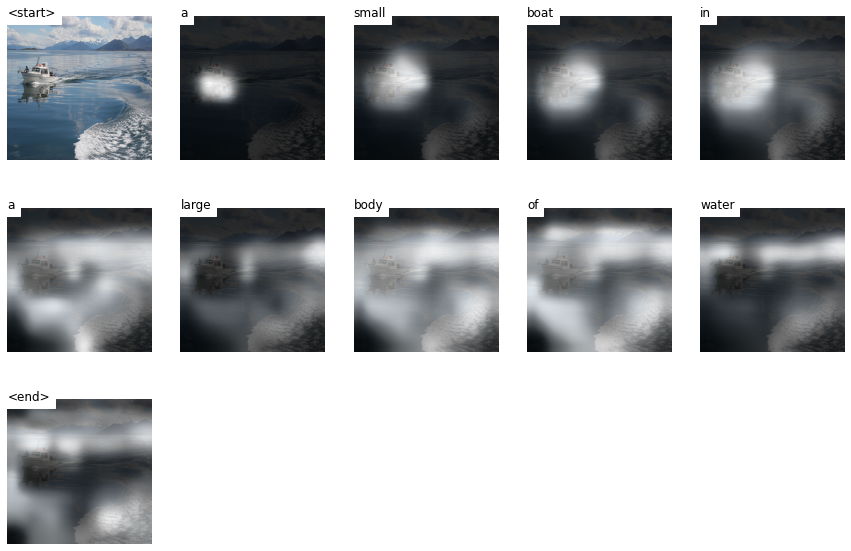

In [11]:
plt.figure(figsize=(15,10))
visualize_att(image_path, seq, alphas, rev_word_map)